In [ ]:
import requests
import cv2
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data_haarcascade.csv')

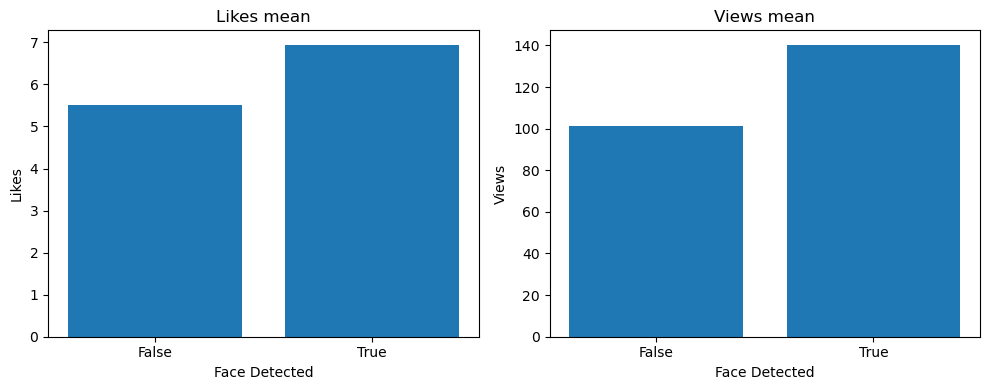

In [4]:
import matplotlib.pyplot as plt

stats = df.groupby('face_detected')[['likes', 'views']].mean()

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Likes 평균
ax[0].bar(stats.index.astype(str), stats['likes'])
ax[0].set_title('Likes mean')
ax[0].set_xlabel('Face Detected')
ax[0].set_ylabel('Likes')

# Views 평균
ax[1].bar(stats.index.astype(str), stats['views'])
ax[1].set_title('Views mean')
ax[1].set_xlabel('Face Detected')
ax[1].set_ylabel('Views')

plt.tight_layout()
plt.show()


likes 찜 수 분석

In [5]:
df = pd.read_csv('data_haarcascade.csv')

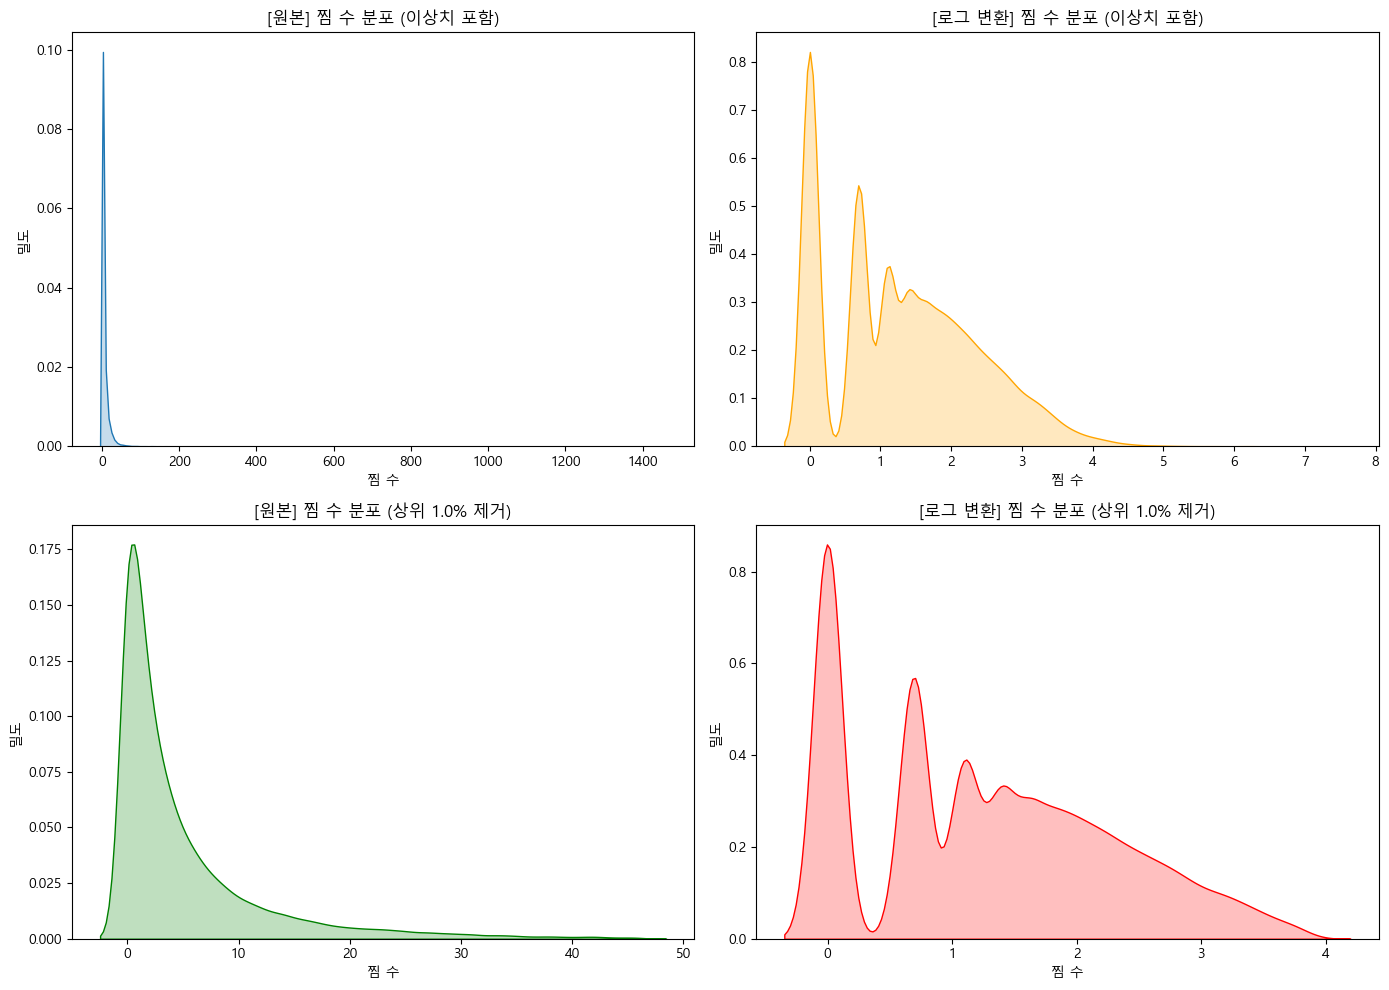

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic")

def show_distribution_comparison(df, col, top_percent=0.01):
    """
    col에 대해 [원본 분포/로그 변환 분포/이상치 제거 후 분포/이상치 제거 후 로그 분포]를 2x2 시각화
    """
    data_original = df[col].dropna()

    # 이상치 제거
    cutoff = data_original.quantile(1 - top_percent)
    data_no_outlier = data_original[data_original <= cutoff]

    # 로그 변환
    log_data = np.log1p(data_original)
    log_no_outlier = np.log1p(data_no_outlier)

    plt.figure(figsize=(14, 10))

    # (1,1) 원본 분포
    plt.subplot(2, 2, 1)
    sns.kdeplot(data_original, fill=True)
    plt.title(f"[원본] 찜 수 분포 (이상치 포함)")
    plt.xlabel(f"찜 수")
    plt.ylabel("밀도")

    # (1,2) 로그 변환 분포
    plt.subplot(2, 2, 2)
    sns.kdeplot(log_data, fill=True, color='orange')
    plt.title(f"[로그 변환] 찜 수 분포 (이상치 포함)")
    plt.xlabel(f"찜 수")
    plt.ylabel("밀도")

    # (2,1) 이상치 제거 후 원본
    plt.subplot(2, 2, 3)
    sns.kdeplot(data_no_outlier, fill=True, color='green')
    plt.title(f"[원본] 찜 수 분포 (상위 {top_percent*100:.1f}% 제거)")
    plt.xlabel(f"찜 수")
    plt.ylabel("밀도")

    # (2,2) 이상치 제거 후 로그
    plt.subplot(2, 2, 4)
    sns.kdeplot(log_no_outlier, fill=True, color='red')
    plt.title(f"[로그 변환] 찜 수 분포 (상위 {top_percent*100:.1f}% 제거)")
    plt.xlabel(f"찜 수")
    plt.ylabel("밀도")

    plt.tight_layout()
    plt.show()

show_distribution_comparison(df, 'likes', top_percent=0.01)

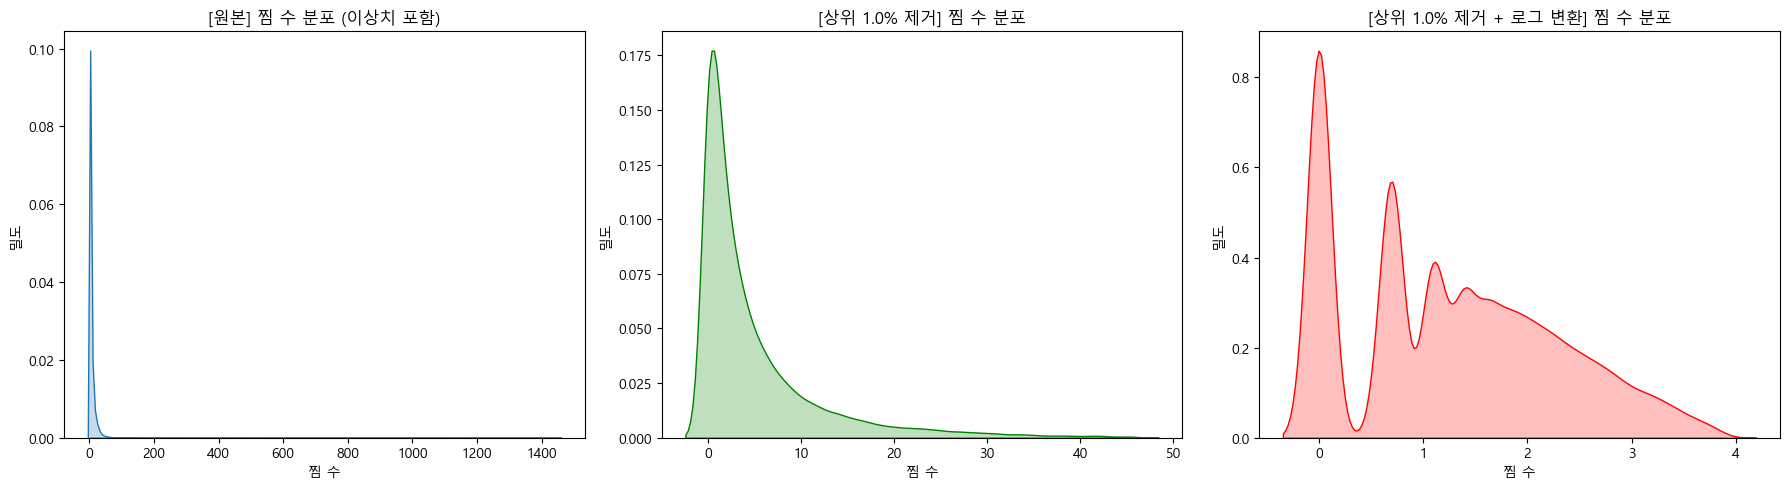

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def show_cleaned_log_distribution(df, col, top_percent=0.01):
    """
    col에 대해 [원본 분포 → 이상치 제거 → 로그 변환 후 분포]를 1행 3열로 시각화
    """
    data_original = df[col].dropna()

    # 이상치 컷 기준 (상위 top_percent 제거)
    cutoff = data_original.quantile(1 - top_percent)
    data_no_outlier = data_original[data_original <= cutoff]

    # 로그 변환
    log_no_outlier = np.log1p(data_no_outlier)

    plt.figure(figsize=(18, 5))

    # 1. 원본 분포
    plt.subplot(1, 3, 1)
    sns.kdeplot(data_original, fill=True)
    plt.title(f"[원본] 찜 수 분포 (이상치 포함)")
    plt.xlabel(f"찜 수")
    plt.ylabel("밀도")

    # 2. 이상치 제거 후 원본
    plt.subplot(1, 3, 2)
    sns.kdeplot(data_no_outlier, fill=True, color='green')
    plt.title(f"[상위 1.0% 제거] 찜 수 분포")
    plt.xlabel(f"찜 수")
    plt.ylabel("밀도")

    # 3. 로그 변환 후 이상치 제거
    plt.subplot(1, 3, 3)
    sns.kdeplot(log_no_outlier, fill=True, color='red')
    plt.title(f"[상위 1.0% 제거 + 로그 변환] 찜 수 분포")
    plt.xlabel(f"찜 수")
    plt.ylabel("밀도")

    plt.tight_layout()
    plt.show()
show_cleaned_log_distribution(df, 'likes', top_percent=0.01)

In [19]:
# 이상치 제거
def remove_outliers(df, col, top_percent=0.01):
    cutoff = df[col].quantile(1 - top_percent)
    return df[df[col] <= cutoff]

df_clean = remove_outliers(df, 'likes', top_percent=0.01)

In [20]:
# 로그변환
df_clean['log_likes'] = np.log1p(df_clean['likes'])

C:\Users\jangj\AppData\Local\Temp\ipykernel_5688\4093610201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_likes'] = np.log1p(df_clean['likes'])


In [22]:
from scipy.stats import shapiro

face_true = df_clean.loc[df_clean['face_detected'], 'log_likes']
face_false = df_clean.loc[~df_clean['face_detected'], 'log_likes']

print("Shapiro test (face=True):", shapiro(face_true))
print("Shapiro test (face=False):", shapiro(face_false))

Shapiro test (face=True): ShapiroResult(statistic=np.float64(0.9453082125167027), pvalue=np.float64(4.927352227404162e-46))
Shapiro test (face=False): ShapiroResult(statistic=np.float64(0.9255995200926098), pvalue=np.float64(3.1871982633311093e-86))


In [23]:
print("평균 likes (log):")
print("face=False:", face_false.mean())
print("face=True :", face_true.mean())

print("\n중앙값 likes (log):")
print("face=False:", face_false.median())
print("face=True :", face_true.median())

평균 likes (log):
face=False: 1.2275001963913557
face=True : 1.4355689338420927

중앙값 likes (log):
face=False: 1.0986122886681098
face=True : 1.3862943611198906


In [24]:
from scipy.stats import ttest_ind, mannwhitneyu

# 예: 정규성 만족 시
t_stat, p_val = ttest_ind(face_true, face_false, equal_var=False)
print("T-test: t=%.3f, p=%.4f" % (t_stat, p_val))

# 예: 정규성 불만족 시
u_stat, p_val = mannwhitneyu(face_true, face_false)
print("Mann-Whitney U test: u=%.3f, p=%.4f" % (u_stat, p_val))

T-test: t=16.021, p=0.0000
Mann-Whitney U test: u=175971626.500, p=0.0000


C:\Users\jangj\AppData\Local\Temp\ipykernel_5688\141200103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['face_label'] = df_clean['face_detected'].map({True: '얼굴 O', False: '얼굴 X'})


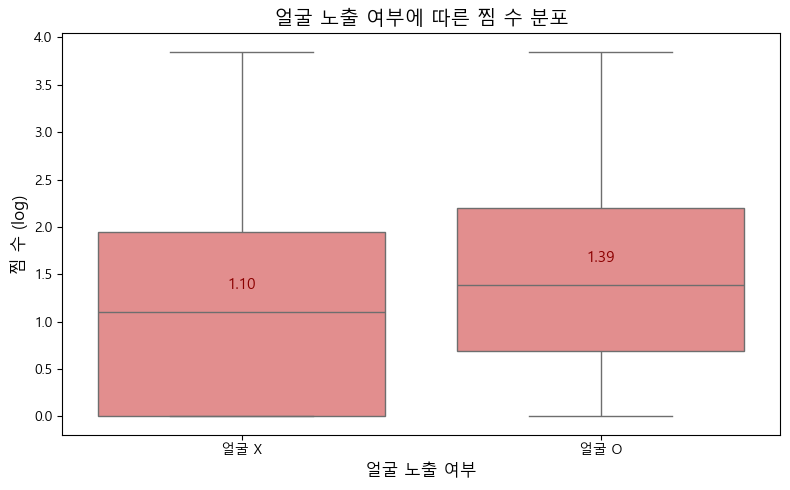

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# True/False → 한글로 변환한 임시 컬럼 추가
df_clean['face_label'] = df_clean['face_detected'].map({True: '얼굴 O', False: '얼굴 X'})

plt.figure(figsize=(8, 5))

# 붉은 계열 박스플롯
sns.boxplot(data=df_clean, x='face_label', y='log_likes', color='lightcoral')

# 한글 제목 및 축 레이블
plt.title('얼굴 노출 여부에 따른 찜 수 분포', fontsize=14)
plt.xlabel('얼굴 노출 여부', fontsize=12)
plt.ylabel('찜 수 (log)', fontsize=12)

# 중앙값 텍스트 표시
for i, line in enumerate(ax.lines):
    if i % 6 == 4:  # 중앙값 선은 각 박스당 6번째 라인(0-indexed: 4, 10, ...)
        x, y = line.get_xdata()[0], line.get_ydata()[0]
        plt.text(x + 0.4, y + 0.2, f'{y:.2f}', ha='center', va='bottom', fontsize=11, color='darkred', clip_on=False)

plt.tight_layout()
plt.show()


views 조회수 분석

In [50]:
df = pd.read_csv('data_haarcascade.csv')

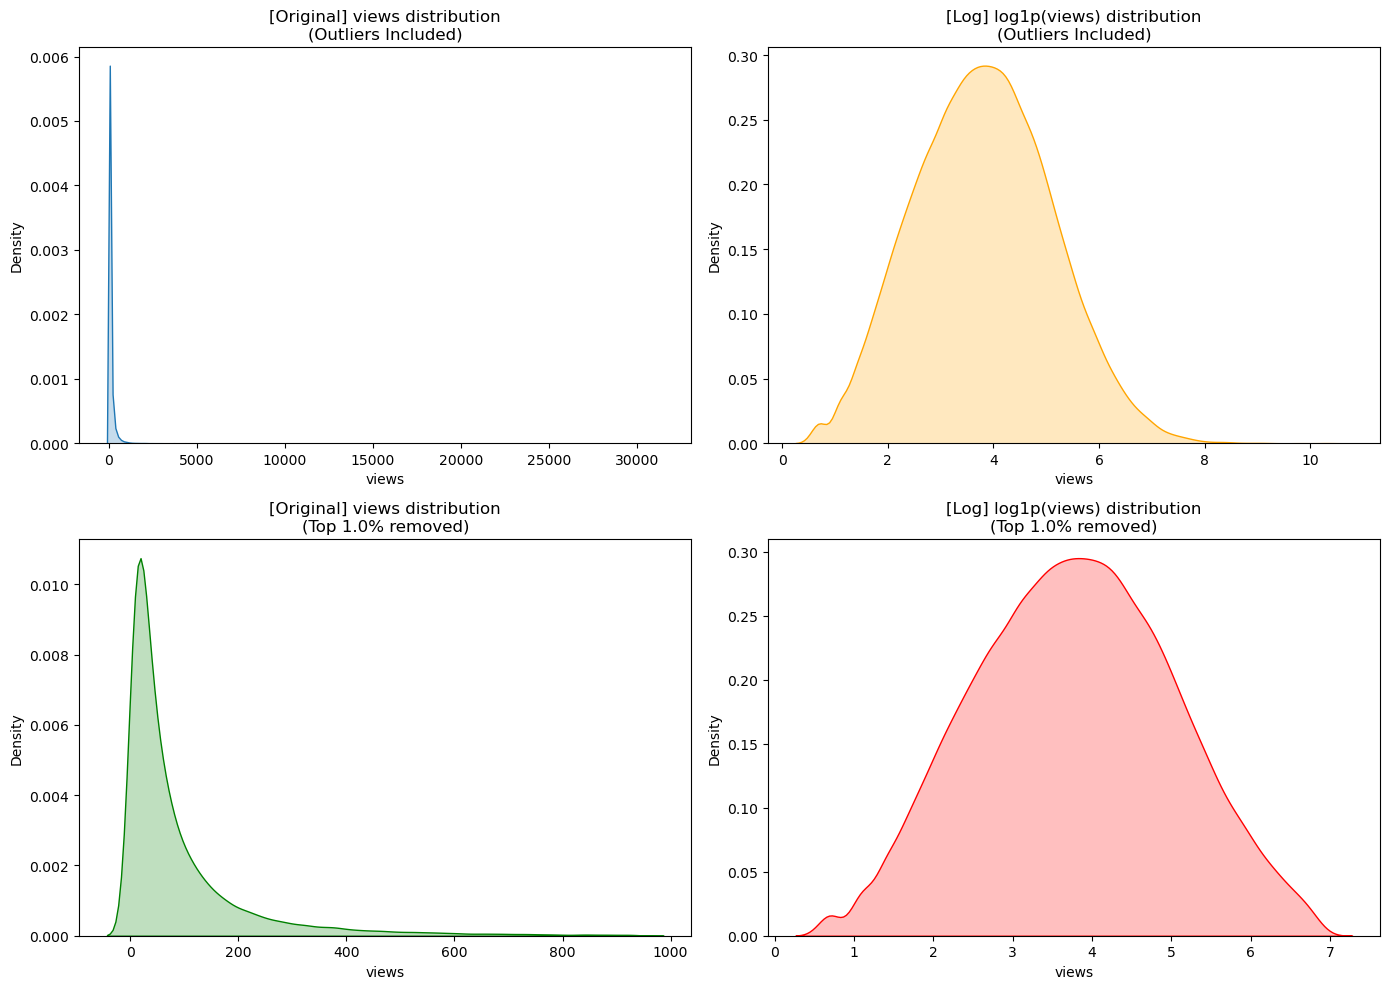

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def show_distribution_comparison(df, col, top_percent=0.01):
    """
    col에 대해 [원본 분포/로그 변환 분포/이상치 제거 후 분포/이상치 제거 후 로그 분포]를 2x2 시각화
    이상치 제거 후 로그 변환된 데이터를 반환
    """
    data_original = df[col].dropna()

    # 이상치 제거
    cutoff = data_original.quantile(1 - top_percent)
    data_no_outlier = data_original[data_original <= cutoff]

    # 로그 변환
    log_data = np.log1p(data_original)
    log_no_outlier = np.log1p(data_no_outlier)

    plt.figure(figsize=(14, 10))

    # (1,1) 원본 분포
    plt.subplot(2, 2, 1)
    sns.kdeplot(data_original, fill=True)
    plt.title(f"[Original] {col} distribution\n(Outliers Included)")

    # (1,2) 로그 변환 분포
    plt.subplot(2, 2, 2)
    sns.kdeplot(log_data, fill=True, color='orange')
    plt.title(f"[Log] log1p({col}) distribution\n(Outliers Included)")

    # (2,1) 이상치 제거 후 원본
    plt.subplot(2, 2, 3)
    sns.kdeplot(data_no_outlier, fill=True, color='green')
    plt.title(f"[Original] {col} distribution\n(Top {top_percent*100:.1f}% removed)")

    # (2,2) 이상치 제거 후 로그
    plt.subplot(2, 2, 4)
    sns.kdeplot(log_no_outlier, fill=True, color='red')
    plt.title(f"[Log] log1p({col}) distribution\n(Top {top_percent*100:.1f}% removed)")

    plt.tight_layout()
    plt.show()

show_distribution_comparison(df, 'views', top_percent=0.01)

In [53]:
# 이상치 제거
def remove_outliers(df, col, top_percent=0.01):
    cutoff = df[col].quantile(1 - top_percent)
    return df[df[col] <= cutoff]

df_view = remove_outliers(df, 'views', top_percent=0.01)

In [54]:
# 로그변환
df_view['log_views'] = np.log1p(df['views'])

C:\Users\jangj\AppData\Local\Temp\ipykernel_5688\4177928317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_view['log_views'] = np.log1p(df['views'])


In [56]:
from scipy.stats import shapiro

face_true = df_view.loc[df_view['face_detected'], 'log_views']
face_false = df_view.loc[~df_view['face_detected'], 'log_views']

print("Shapiro test (face=True):", shapiro(face_true))
print("Shapiro test (face=False):", shapiro(face_false))

Shapiro test (face=True): ShapiroResult(statistic=np.float64(0.9928430563756603), pvalue=np.float64(7.605524103558776e-19))
Shapiro test (face=False): ShapiroResult(statistic=np.float64(0.9949367861364735), pvalue=np.float64(1.3150759943395166e-34))


In [57]:
print("평균 views (log):")
print("face=False:", face_false.mean())
print("face=True :", face_true.mean())

print("\n중앙값 views (log):")
print("face=False:", face_false.median())
print("face=True :", face_true.median())

평균 views (log):
face=False: 3.72266808599203
face=True : 4.072226531596338

중앙값 views (log):
face=False: 3.713572066704308
face=True : 4.110873864173311


In [58]:
from scipy.stats import ttest_ind, mannwhitneyu

# 예: 정규성 만족 시
t_stat, p_val = ttest_ind(face_true, face_false, equal_var=False)
print("T-test: t=%.3f, p=%.4f" % (t_stat, p_val))

# 예: 정규성 불만족 시
u_stat, p_val = mannwhitneyu(face_true, face_false)
print("Mann-Whitney U test: u=%.3f, p=%.4f" % (u_stat, p_val))

T-test: t=22.236, p=0.0000
Mann-Whitney U test: u=182392113.000, p=0.0000


C:\Users\jangj\AppData\Local\Temp\ipykernel_5688\1820551942.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['얼굴 X', '얼굴 O'])


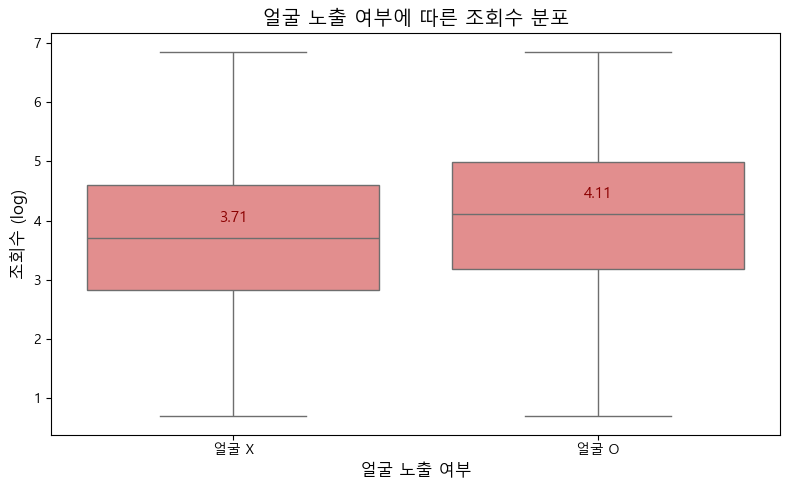

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df_view, x='face_detected', y='log_views', color='lightcoral')

# 제목 및 축 레이블
ax.set_title('얼굴 노출 여부에 따른 조회수 분포', fontsize=14)
ax.set_xlabel('얼굴 노출 여부', fontsize=12)
ax.set_ylabel('조회수 (log)', fontsize=12)
ax.set_xticklabels(['얼굴 X', '얼굴 O'])

# 중앙값 표기
for i, line in enumerate(ax.lines):
    if i % 6 == 4:  # 중앙값에 해당하는 라인
        x, y = line.get_xdata()[0], line.get_ydata()[0]
        ax.text(x + 0.4, y + 0.2, f'{y:.2f}', ha='center', va='bottom', 
                fontsize=11, color='darkred', clip_on=False)

plt.tight_layout()
plt.show()
